In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#/content/drive/MyDrive/Colab Notebooks/MS_04072022/ms_modules
import sys
sys.path.append('/content/drive/MyDrive/Colab Notebooks/MS_04072022/ms_modules')

In [ ]:
import numpy as np
from sklearn.ensemble import RandomForestRegressor
from random import randrange
import matplotlib.pyplot as plt

from models import Read4x4
from models import setStartState
from models import RandomForestClassifier_CSDivEntSamplingBeta
from models import RandomForestClassifier_EntropySampling
from models import RandomForestClassifier_RandomSampling
from models import RandomForestClassifier_CSDivEntSamplingMinMax


 experiment #1

 experiment #2

 experiment #3

 experiment #4

 experiment #5

 experiment #6

 experiment #7

 experiment #8

 experiment #9

 experiment #10

 experiment #11

 experiment #12

 experiment #13

 experiment #14

 experiment #15

 experiment #16

 experiment #17

 experiment #18

 experiment #19

 experiment #20


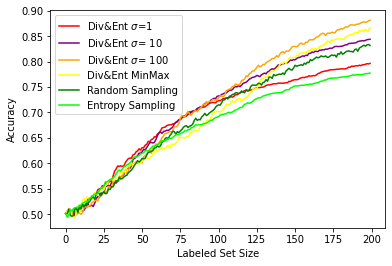

In [8]:
# number of experiment repeats
nExperiments = 20
# number of estimators (random trees) in the classifier
nEstimators = 50
# number of labeled points at the beginning of the AL experiment
nStart = 2
# number of iterations in AL experiment
nIterations = 200

Acc_CSDivEnt1 = np.zeros(nIterations)
Acc_CSDivEnt10 = np.zeros(nIterations)
Acc_CSDivEnt100 = np.zeros(nIterations)
Acc_CSDivEntMinMax = np.zeros(nIterations)
Acc_Random = np.zeros(nIterations)
Acc_Entropy = np.zeros(nIterations)

randInt = randrange(1000)

X_Train, X_Test, Y_Train, Y_Test, cov, cov2 = Read4x4("/content/drive/MyDrive/Colab Notebooks/MS_04072022/data/checkerboard4x4_train.npz", "/content/drive/MyDrive/Colab Notebooks/MS_04072022/data/checkerboard4x4_test.npz")

for i in range(nExperiments):
    print('\n experiment #'+str(i+1))
        
    indicesKnown = setStartState(X_Train, Y_Train, nStart)

    Total_Set_X = X_Train
    Total_Set_Y = Y_Train
    
    L_X_Set, L_Y_Set = X_Train[indicesKnown], Y_Train[indicesKnown]
    
    X_train, Y_train = np.delete(X_Train, indicesKnown, 0), np.delete(Y_Train, indicesKnown, 0)
    
    Acc_CSDivEnt1 += RandomForestClassifier_CSDivEntSamplingBeta(Total_Set_X, Total_Set_Y, X_train, L_X_Set, Y_train, L_Y_Set,
                                                  X_Test, Y_Test, nIterations, Covariance=cov2, Covariance2=cov, beta=1, randInt=randInt)

    Acc_CSDivEnt10 += RandomForestClassifier_CSDivEntSamplingBeta(Total_Set_X, Total_Set_Y, X_train, L_X_Set, Y_train, L_Y_Set,
                                                  X_Test, Y_Test, nIterations, Covariance=cov2, Covariance2=cov, beta=10, randInt=randInt)

    Acc_CSDivEnt100 += RandomForestClassifier_CSDivEntSamplingBeta(Total_Set_X, Total_Set_Y, X_train, L_X_Set, Y_train, L_Y_Set, 
                                                    X_Test, Y_Test, nIterations,  Covariance=cov2, Covariance2=cov, beta=100, randInt=randInt)

    Acc_CSDivEntMinMax += RandomForestClassifier_CSDivEntSamplingMinMax(Total_Set_X, Total_Set_Y, X_train, L_X_Set, Y_train, L_Y_Set, 
                                                    X_Test, Y_Test, nIterations,  Covariance=cov2, Covariance2=cov, randInt=randInt)

    
    Acc_Random += RandomForestClassifier_RandomSampling(Total_Set_X, Total_Set_Y, X_train, L_X_Set, Y_train, L_Y_Set,
                                                    X_Test, Y_Test, nIterations, randInt=randInt)
    

    Acc_Entropy += RandomForestClassifier_EntropySampling(Total_Set_X, Total_Set_Y, X_train, L_X_Set, Y_train, L_Y_Set,
                                                      X_Test, Y_Test, nIterations, randInt=randInt)

    indicesKnown = setStartState(X_Train, Y_Train, nStart)

fig = plt.figure()
plt.plot(Acc_CSDivEnt1/nExperiments, 'red', label='Div&Ent $\sigma$=1')
plt.plot(Acc_CSDivEnt10/nExperiments, 'purple', label='Div&Ent $\sigma$= 10')
plt.plot(Acc_CSDivEnt100/nExperiments, 'orange', label='Div&Ent $\sigma$= 100')
plt.plot(Acc_CSDivEntMinMax/nExperiments, 'yellow', label='Div&Ent MinMax')
plt.plot(Acc_Random/nExperiments, 'green', label='Random Sampling')
plt.plot(Acc_Entropy/nExperiments, 'lime', label='Entropy Sampling')

plt.xlabel('Labeled Set Size')
plt.ylabel('Accuracy')

plt.legend()

fig.savefig(r'/content/drive/MyDrive/Colab Notebooks/MS_04072022/results/CheckerBoard4x4_result_20_200_exp.svg', format='svg', dpi=1200)

In [9]:
print('CSDivEnt1\n')
print(str(Acc_CSDivEnt1/nExperiments))
print('\n')
print('CSDivEnt10\n')
print(str(Acc_CSDivEnt10/nExperiments))
print('\n')
print('CSDivEnt100\n')
print(str(Acc_CSDivEnt100/nExperiments))
print('\n')
print('CSDivEntMinMax\n')
print(str(Acc_CSDivEntMinMax/nExperiments))
print('\n')
print('Random CSDivEnt\n')
print(str(Acc_Random/nExperiments))
print('\n')
print('Entropy\n')
print(str(Acc_Entropy/nExperiments))
print('\n')

CSDivEnt1

[0.5012  0.5056  0.5076  0.50685 0.5012  0.499   0.50975 0.5111  0.5062
 0.51215 0.5081  0.5184  0.5154  0.5149  0.51765 0.5314  0.5287  0.535
 0.53625 0.54065 0.5403  0.5477  0.5496  0.55015 0.5559  0.55465 0.56045
 0.5609  0.5618  0.5661  0.56315 0.5747  0.5844  0.58865 0.59465 0.5938
 0.59495 0.59405 0.5945  0.6012  0.6056  0.6092  0.61    0.6101  0.61665
 0.61735 0.62235 0.6243  0.62845 0.626   0.6308  0.6306  0.6356  0.6372
 0.64335 0.6423  0.64665 0.6476  0.65225 0.65155 0.6576  0.6592  0.664
 0.66945 0.6705  0.671   0.67405 0.675   0.67565 0.67565 0.67745 0.6777
 0.6802  0.68305 0.6856  0.68585 0.68925 0.6933  0.69125 0.6932  0.69575
 0.70155 0.7002  0.70035 0.7032  0.70395 0.7047  0.70585 0.7095  0.70995
 0.7104  0.71085 0.71315 0.71555 0.71805 0.7187  0.71965 0.7195  0.71875
 0.722   0.723   0.72335 0.72495 0.72735 0.72765 0.72845 0.7291  0.729
 0.73105 0.73    0.7317  0.7346  0.7348  0.7365  0.73855 0.7396  0.74085
 0.7429  0.74345 0.74195 0.74275 0.74435 0.74405 0